In [1]:
# 전체 데이터 20대, 부모세대, 그 외 세대의 향수와 성년의 검색량
# 19년도 성년의 날인 5월 20일의 검색량과 각 컬럼의 최대값과의 차이를 비교
# 네이버의 데이터의 경우 성년의 검색량과 향수의 검색량이 20대와 부모세대는 같이 증가하지만
# 그 외의 연령대에서는 그렇지 않음을 볼 수 있음
# 따라서 성년의 날과 관련된 사람의 경우 성년의 날의 영향으로 향수에 대한 검색량이 증가함을 유추할 수 있음
# 이를 더 증명하기 위해 카카오의 데이터를 가져옴
# 20대의 경우 네이버와 동일한 형태를 보임
# 근데 부모 세대의 경우 성년의 검색량은 유사하지만 향수에 대한 검색량은 영향을 받지 않음
# 부모 세대는 카카오를 잘 못쓴다. 분발해라 카카오

In [2]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

DIR_PATH = './Data_jaehun/'
FILE_N_ALL = 'naver_all.xlsx'
FILE_N_20 = 'naver_target.xlsx'
FILE_N_PARENT = 'naver_parent.xlsx'
FILE_N_ELSE = 'naver_else.xlsx'

# 한글 폰트 설정
font_path = './Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 전체 
dfNAll = pd.read_excel(DIR_PATH + FILE_N_ALL)
# 20대
dfN20 = pd.read_excel(DIR_PATH + FILE_N_20)
# 부모세대
dfNPar = pd.read_excel(DIR_PATH + FILE_N_PARENT)
# 그 외
dfNElse = pd.read_excel(DIR_PATH + FILE_N_ELSE)

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# 중복된 날짜컬럼 삭제
dfNAll.drop(dfNAll.columns[2], axis = 1, inplace=True)
# 0에서 5까지 필요없는 행 삭제
dfNAll.drop([0,1,2,3,4], inplace=True)
# index 변경
dfNAll.reset_index(drop=True, inplace=True)
# 가장 위에 있는 글자들로 컬럼명 설정
dfNAll.columns = dfNAll.iloc[0]
# 필요없어진 컬럼 삭제
dfNAll.drop(0, inplace=True)
# 데이터를 타입을 필요에 맞춰 변경
dfNAll['날짜'] = dfNAll['날짜'].astype('datetime64')
dfNAll['향수'] = dfNAll['향수'].astype(float)
dfNAll['성년'] = dfNAll['성년'].astype(float)

In [8]:
dfNAll[dfNAll['날짜']=='2019-05-20']

,날짜,향수,성년
140,2019-05-20,100.0,39.88027


In [5]:
# 날짜별 데이터를 평균으로 나눠서 평균 대비 하루 검색량이 얼마나 바뀌는가 보여줍니다

In [6]:
data_list_01 = []
data_list_02 = []
for i in range(1, len(dfNAll.index) + 1):
    data_01 = dfNAll['향수'][i]/dfNAll['향수'].mean()
    data_02 = dfNAll['성년'][i]/dfNAll['성년'].mean()
    data_list_01.append(data_01)
    data_list_02.append(data_02)
    df_01 = pd.DataFrame(data_list_01, columns=['향수 클릭 변동'])
    df_02 = pd.DataFrame(data_list_02, columns=['성년 클릭 변동'])

AttributeError: 'Line2D' object has no property 'kind'

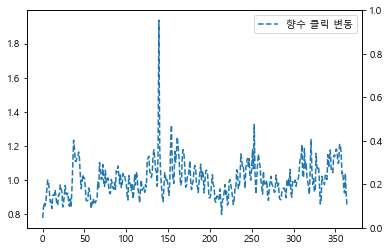

In [7]:
# 데이터 스케일링 진행 후 시각화, 이중축 그래프 사용
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_list_01, '--', label='향수 클릭 변동')
ax1.legend()
ax2.plot(data_list_02, color = 'r', kind='bar',label='성년 클릭 변동')
ax2.legend()
plt.xlabel('년도')    # x축 라벨
plt.title('임시')
plt.xticks()
plt.yticks()

plt.show()

In [ ]:
df_01.set_index(dfNAll['날짜'])
df_02.set_index(dfNAll['날짜'])

In [ ]:
df_01 = df_01.join(df_02)

In [ ]:
df_01

In [ ]:
df_01.plot()

In [ ]:

df_02.plot(kind='bar')